<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana07_PO450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [129]:
# Geracao de dados
N = 5000 # Numero de amostras
mean_C1 = [0, 0]
cov_C1 = [[3, 0], [0, 3]]  # diagonal covariance
X_C1 = np.random.multivariate_normal(mean_C1, cov_C1,int(N/2))
d_C1 = -np.ones((int(N/2),1))

mean_C2 = [3, 3]
cov_C2 = [[3, 0], [0, 3]]  # diagonal covariance
X_C2 = np.random.multivariate_normal(mean_C2, cov_C2,int(N/2))
d_C2 = np.ones((int(N/2),1))

In [130]:
X_aux = np.concatenate((X_C1,X_C2), axis=0)
d_aux = np.concatenate((d_C1,d_C2), axis=0)

In [131]:
indx = np.arange(len(X_aux))
np.random.shuffle(indx)

X = X_aux[indx]
d = d_aux[indx]

In [132]:
prop_test = 0.3
X_train, X_test, d_train, d_test = train_test_split(X, d, test_size = prop_test)

In [133]:
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train, d_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.sign(y_hat_train)
error_train = np.abs(d_hat_train - d_train)/2 # 0 é acerto; 1 é erro.
acc_train = 1 - (np.sum(error_train)/error_train.size)
print('Acurácia do treinamento: ', acc_train)

Acurácia do treinamento:  0.8851428571428571


In [135]:
y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.sign(y_hat_test)
error_test = np.abs(d_hat_test - d_test)/2 # 0 é acerto; 1 é erro.
acc_test = 1 - (np.sum(error_test)/error_test.size)
print('Acurácia do teste: ', acc_test)

Acurácia do teste:  0.8926666666666667


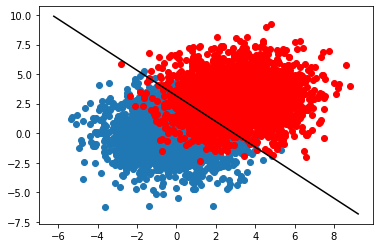

In [136]:
w_LS = np.zeros(3)
w_LS[0] = model_reg_linear.intercept_
w_LS[1] = model_reg_linear.coef_[0,0]
w_LS[2] = model_reg_linear.coef_[0,1]
x1aux = np.linspace(X.min(), X.max(), 2000)
x2aux = -(w_LS[1]/w_LS[2])*x1aux-(w_LS[0]/w_LS[2])
plt.plot(X_C1[:,0], X_C1[:,1],'o')
plt.plot(X_C2[:,0], X_C2[:,1], 'ro')
plt.plot(x1aux,x2aux,'k')
plt.show()

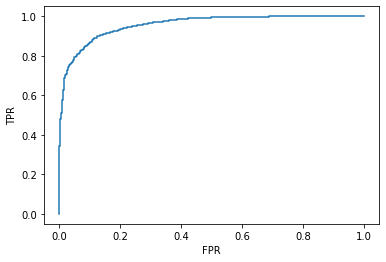

In [137]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_train, y_hat_train)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR");

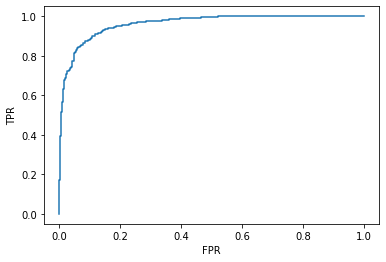

In [138]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, y_hat_test)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR");

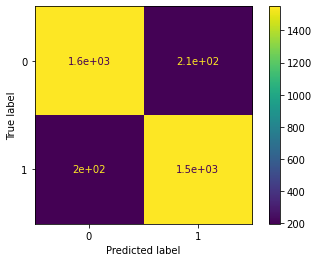

In [139]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(0,1))
disp.plot();

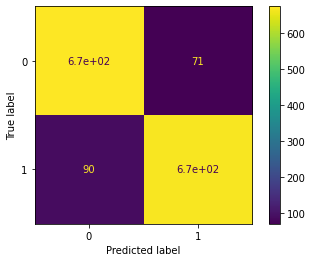

In [140]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix, display_labels=(0,1))
disp.plot();